In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
import plotly.express as px
import plotly.graph_objects as gp

In [2]:
df1 = pd.read_csv("pune.csv")

In [3]:
df1.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2009-01-01 00:00:00,31,13,0.0,11.0,6,1,31,10:17 AM,10:16 PM,...,18,7,0,50,0.0,1013,13,10,59,3
1,2009-01-01 01:00:00,31,13,0.0,11.0,6,1,31,10:17 AM,10:16 PM,...,18,9,0,47,0.0,1013,14,10,57,4
2,2009-01-01 02:00:00,31,13,0.0,11.0,6,1,31,10:17 AM,10:16 PM,...,18,10,0,44,0.0,1013,14,10,55,5
3,2009-01-01 03:00:00,31,13,0.0,11.0,6,1,31,10:17 AM,10:16 PM,...,18,12,0,41,0.0,1013,15,10,54,6
4,2009-01-01 04:00:00,31,13,0.0,11.0,6,1,31,10:17 AM,10:16 PM,...,20,11,1,38,0.0,1014,16,10,68,6


In [4]:
df1.tail()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
96427,2020-01-01 19:00:00,29,18,0.0,11.0,6,1,37,11:34 AM,11:32 PM,...,23,20,3,49,0.0,1014,23,10,255,12
96428,2020-01-01 20:00:00,29,18,0.0,11.0,6,1,37,11:34 AM,11:32 PM,...,22,19,3,53,0.0,1014,22,10,258,11
96429,2020-01-01 21:00:00,29,18,0.0,11.0,6,1,37,11:34 AM,11:32 PM,...,21,18,2,57,0.0,1015,21,10,262,10
96430,2020-01-01 22:00:00,29,18,0.0,11.0,6,1,37,11:34 AM,11:32 PM,...,20,17,2,60,0.0,1015,20,10,264,9
96431,2020-01-01 23:00:00,29,18,0.0,11.0,6,1,37,11:34 AM,11:32 PM,...,20,16,2,62,0.0,1015,20,10,267,9


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96432 entries, 0 to 96431
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_time          96432 non-null  object 
 1   maxtempC           96432 non-null  int64  
 2   mintempC           96432 non-null  int64  
 3   totalSnow_cm       96432 non-null  float64
 4   sunHour            96432 non-null  float64
 5   uvIndex            96432 non-null  int64  
 6   uvIndex.1          96432 non-null  int64  
 7   moon_illumination  96432 non-null  int64  
 8   moonrise           96432 non-null  object 
 9   moonset            96432 non-null  object 
 10  sunrise            96432 non-null  object 
 11  sunset             96432 non-null  object 
 12  DewPointC          96432 non-null  int64  
 13  FeelsLikeC         96432 non-null  int64  
 14  HeatIndexC         96432 non-null  int64  
 15  WindChillC         96432 non-null  int64  
 16  WindGustKmph       964

In [6]:
df2 = pd.read_csv("nagpur.csv")

In [7]:
df2.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2009-01-01 00:00:00,30,14,0.0,8.7,5,1,31,09:57 AM,09:53 PM,...,17,14,0,48,0.0,1013,14,10,15,6
1,2009-01-01 01:00:00,30,14,0.0,8.7,5,1,31,09:57 AM,09:53 PM,...,17,16,0,48,0.0,1014,14,10,21,8
2,2009-01-01 02:00:00,30,14,0.0,8.7,5,1,31,09:57 AM,09:53 PM,...,16,19,0,48,0.0,1014,14,10,27,9
3,2009-01-01 03:00:00,30,14,0.0,8.7,5,1,31,09:57 AM,09:53 PM,...,15,21,0,49,0.0,1015,14,10,32,10
4,2009-01-01 04:00:00,30,14,0.0,8.7,5,1,31,09:57 AM,09:53 PM,...,17,18,0,47,0.0,1015,15,10,34,10


In [8]:
df2.tail()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
96427,2020-01-01 19:00:00,24,14,0.0,7.2,5,1,37,11:14 AM,11:08 PM,...,20,16,43,76,0.1,1016,20,10,105,9
96428,2020-01-01 20:00:00,24,14,0.0,7.2,5,1,37,11:14 AM,11:08 PM,...,19,19,51,79,0.3,1017,19,10,103,10
96429,2020-01-01 21:00:00,24,14,0.0,7.2,5,1,37,11:14 AM,11:08 PM,...,18,21,60,82,0.4,1018,18,10,101,12
96430,2020-01-01 22:00:00,24,14,0.0,7.2,5,1,37,11:14 AM,11:08 PM,...,18,21,53,83,0.2,1018,18,10,98,12
96431,2020-01-01 23:00:00,24,14,0.0,7.2,5,1,37,11:14 AM,11:08 PM,...,17,21,47,84,0.0,1018,17,10,95,12


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96432 entries, 0 to 96431
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_time          96432 non-null  object 
 1   maxtempC           96432 non-null  int64  
 2   mintempC           96432 non-null  int64  
 3   totalSnow_cm       96432 non-null  float64
 4   sunHour            96432 non-null  float64
 5   uvIndex            96432 non-null  int64  
 6   uvIndex.1          96432 non-null  int64  
 7   moon_illumination  96432 non-null  int64  
 8   moonrise           96432 non-null  object 
 9   moonset            96432 non-null  object 
 10  sunrise            96432 non-null  object 
 11  sunset             96432 non-null  object 
 12  DewPointC          96432 non-null  int64  
 13  FeelsLikeC         96432 non-null  int64  
 14  HeatIndexC         96432 non-null  int64  
 15  WindChillC         96432 non-null  int64  
 16  WindGustKmph       964

In [10]:
df3 = pd.read_csv("kanpur.csv")

In [11]:
df3.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2009-01-01 00:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,...,11,21,17,50,0.0,1015,11,10,320,10
1,2009-01-01 01:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,...,12,22,11,52,0.0,1015,11,10,315,11
2,2009-01-01 02:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,...,12,23,6,55,0.0,1015,11,10,310,11
3,2009-01-01 03:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,...,12,23,0,57,0.0,1015,10,10,304,12
4,2009-01-01 04:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,...,14,19,0,54,0.0,1016,11,10,302,11


In [12]:
df3.tail()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
96427,2020-01-01 19:00:00,15,11,0.0,7.1,4,1,37,11:13 AM,11:00 PM,...,13,21,53,61,0.0,1019,13,8,74,11
96428,2020-01-01 20:00:00,15,11,0.0,7.1,4,1,37,11:13 AM,11:00 PM,...,12,22,39,61,0.0,1020,13,9,81,11
96429,2020-01-01 21:00:00,15,11,0.0,7.1,4,1,37,11:13 AM,11:00 PM,...,12,23,25,62,0.0,1020,13,10,88,11
96430,2020-01-01 22:00:00,15,11,0.0,7.1,4,1,37,11:13 AM,11:00 PM,...,12,21,26,63,0.0,1020,13,10,85,11
96431,2020-01-01 23:00:00,15,11,0.0,7.1,4,1,37,11:13 AM,11:00 PM,...,12,20,27,64,0.0,1020,12,10,83,10


In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96432 entries, 0 to 96431
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_time          96432 non-null  object 
 1   maxtempC           96432 non-null  int64  
 2   mintempC           96432 non-null  int64  
 3   totalSnow_cm       96432 non-null  float64
 4   sunHour            96432 non-null  float64
 5   uvIndex            96432 non-null  int64  
 6   uvIndex.1          96432 non-null  int64  
 7   moon_illumination  96432 non-null  int64  
 8   moonrise           96432 non-null  object 
 9   moonset            96432 non-null  object 
 10  sunrise            96432 non-null  object 
 11  sunset             96432 non-null  object 
 12  DewPointC          96432 non-null  int64  
 13  FeelsLikeC         96432 non-null  int64  
 14  HeatIndexC         96432 non-null  int64  
 15  WindChillC         96432 non-null  int64  
 16  WindGustKmph       964

In [14]:
df4 = pd.read_csv("jaipur.csv")

In [15]:
df4.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2009-01-01 00:00:00,24,8,0.0,8.7,4,1,31,10:15 AM,10:03 PM,...,11,17,1,49,0.0,1017,9,10,4,8
1,2009-01-01 01:00:00,24,8,0.0,8.7,4,1,31,10:15 AM,10:03 PM,...,11,17,1,50,0.0,1017,9,10,3,8
2,2009-01-01 02:00:00,24,8,0.0,8.7,4,1,31,10:15 AM,10:03 PM,...,10,18,1,51,0.0,1017,9,10,2,8
3,2009-01-01 03:00:00,24,8,0.0,8.7,4,1,31,10:15 AM,10:03 PM,...,9,18,1,52,0.0,1017,8,10,1,9
4,2009-01-01 04:00:00,24,8,0.0,8.7,4,1,31,10:15 AM,10:03 PM,...,11,15,1,49,0.0,1018,10,10,1,8


In [16]:
df4.tail()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
96427,2020-01-01 19:00:00,19,8,0.0,8.7,4,4,37,11:32 AM,11:19 PM,...,12,34,7,58,0.0,1020,13,10,76,18
96428,2020-01-01 20:00:00,19,8,0.0,8.7,4,1,37,11:32 AM,11:19 PM,...,11,36,7,61,0.0,1021,13,10,77,18
96429,2020-01-01 21:00:00,19,8,0.0,8.7,4,1,37,11:32 AM,11:19 PM,...,10,37,7,64,0.0,1021,12,10,78,18
96430,2020-01-01 22:00:00,19,8,0.0,8.7,4,1,37,11:32 AM,11:19 PM,...,9,37,7,66,0.0,1021,11,10,77,18
96431,2020-01-01 23:00:00,19,8,0.0,8.7,4,1,37,11:32 AM,11:19 PM,...,9,37,6,68,0.0,1022,11,10,76,18


In [17]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96432 entries, 0 to 96431
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_time          96432 non-null  object 
 1   maxtempC           96432 non-null  int64  
 2   mintempC           96432 non-null  int64  
 3   totalSnow_cm       96432 non-null  float64
 4   sunHour            96432 non-null  float64
 5   uvIndex            96432 non-null  int64  
 6   uvIndex.1          96432 non-null  int64  
 7   moon_illumination  96432 non-null  int64  
 8   moonrise           96432 non-null  object 
 9   moonset            96432 non-null  object 
 10  sunrise            96432 non-null  object 
 11  sunset             96432 non-null  object 
 12  DewPointC          96432 non-null  int64  
 13  FeelsLikeC         96432 non-null  int64  
 14  HeatIndexC         96432 non-null  int64  
 15  WindChillC         96432 non-null  int64  
 16  WindGustKmph       964

In [18]:
df5 = pd.read_csv("hyderabad.csv")

In [19]:
df5.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2009-01-01 00:00:00,28,15,0.0,8.7,6,1,31,09:57 AM,09:58 PM,...,21,9,0,83,0.0,1013,16,10,150,6
1,2009-01-01 01:00:00,28,15,0.0,8.7,6,1,31,09:57 AM,09:58 PM,...,20,9,0,85,0.0,1013,16,10,148,5
2,2009-01-01 02:00:00,28,15,0.0,8.7,6,1,31,09:57 AM,09:58 PM,...,20,8,0,86,0.0,1013,15,10,147,5
3,2009-01-01 03:00:00,28,15,0.0,8.7,6,1,31,09:57 AM,09:58 PM,...,19,8,0,88,0.0,1013,15,10,145,5
4,2009-01-01 04:00:00,28,15,0.0,8.7,6,1,31,09:57 AM,09:58 PM,...,21,7,0,80,0.0,1014,16,10,148,5


In [20]:
df5.tail()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
96427,2020-01-01 19:00:00,26,18,0.0,4.2,5,1,37,11:14 AM,11:13 PM,...,22,23,85,75,0.1,1015,22,9,136,15
96428,2020-01-01 20:00:00,26,18,0.0,4.2,5,1,37,11:14 AM,11:13 PM,...,22,23,84,77,0.3,1015,22,9,135,15
96429,2020-01-01 21:00:00,26,18,0.0,4.2,5,1,37,11:14 AM,11:13 PM,...,21,24,84,79,0.4,1016,21,9,133,15
96430,2020-01-01 22:00:00,26,18,0.0,4.2,5,1,37,11:14 AM,11:13 PM,...,21,25,85,82,0.2,1016,21,9,134,16
96431,2020-01-01 23:00:00,26,18,0.0,4.2,5,1,37,11:14 AM,11:13 PM,...,20,27,87,85,0.2,1016,20,9,135,17


In [21]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96432 entries, 0 to 96431
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_time          96432 non-null  object 
 1   maxtempC           96432 non-null  int64  
 2   mintempC           96432 non-null  int64  
 3   totalSnow_cm       96432 non-null  float64
 4   sunHour            96432 non-null  float64
 5   uvIndex            96432 non-null  int64  
 6   uvIndex.1          96432 non-null  int64  
 7   moon_illumination  96432 non-null  int64  
 8   moonrise           96432 non-null  object 
 9   moonset            96432 non-null  object 
 10  sunrise            96432 non-null  object 
 11  sunset             96432 non-null  object 
 12  DewPointC          96432 non-null  int64  
 13  FeelsLikeC         96432 non-null  int64  
 14  HeatIndexC         96432 non-null  int64  
 15  WindChillC         96432 non-null  int64  
 16  WindGustKmph       964

In [22]:
df6 = pd.read_csv("delhi.csv")

In [23]:
df6.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2009-01-01 00:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,...,14,19,0,50,0.0,1016,10,10,331,12
1,2009-01-01 01:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,...,13,21,0,51,0.0,1016,10,10,329,13
2,2009-01-01 02:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,...,12,22,0,52,0.0,1016,9,10,327,13
3,2009-01-01 03:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,...,11,23,0,54,0.0,1016,9,10,326,13
4,2009-01-01 04:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,...,11,21,2,52,0.0,1016,9,10,318,13


In [24]:
df6.tail()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
96427,2020-01-01 19:00:00,19,10,0.0,8.7,5,1,37,11:28 AM,11:12 PM,...,17,11,10,39,0.0,1020,17,10,96,9
96428,2020-01-01 20:00:00,19,10,0.0,8.7,5,1,37,11:28 AM,11:12 PM,...,16,11,9,40,0.0,1021,16,10,97,8
96429,2020-01-01 21:00:00,19,10,0.0,8.7,5,1,37,11:28 AM,11:12 PM,...,16,12,8,41,0.0,1021,16,10,98,8
96430,2020-01-01 22:00:00,19,10,0.0,8.7,5,1,37,11:28 AM,11:12 PM,...,15,11,8,42,0.0,1021,15,10,96,8
96431,2020-01-01 23:00:00,19,10,0.0,8.7,5,1,37,11:28 AM,11:12 PM,...,15,10,7,42,0.0,1022,15,10,94,8


In [25]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96432 entries, 0 to 96431
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_time          96432 non-null  object 
 1   maxtempC           96432 non-null  int64  
 2   mintempC           96432 non-null  int64  
 3   totalSnow_cm       96432 non-null  float64
 4   sunHour            96432 non-null  float64
 5   uvIndex            96432 non-null  int64  
 6   uvIndex.1          96432 non-null  int64  
 7   moon_illumination  96432 non-null  int64  
 8   moonrise           96432 non-null  object 
 9   moonset            96432 non-null  object 
 10  sunrise            96432 non-null  object 
 11  sunset             96432 non-null  object 
 12  DewPointC          96432 non-null  int64  
 13  FeelsLikeC         96432 non-null  int64  
 14  HeatIndexC         96432 non-null  int64  
 15  WindChillC         96432 non-null  int64  
 16  WindGustKmph       964

In [26]:
df7 = pd.read_csv("bombay.csv")

In [27]:
df7.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2009-01-01 00:00:00,30,22,0.0,11.0,7,1,31,10:21 AM,10:20 PM,...,27,11,0,49,0.0,1012,22,10,20,10
1,2009-01-01 01:00:00,30,22,0.0,11.0,7,1,31,10:21 AM,10:20 PM,...,26,12,0,50,0.0,1012,22,10,18,11
2,2009-01-01 02:00:00,30,22,0.0,11.0,7,1,31,10:21 AM,10:20 PM,...,26,14,0,50,0.0,1012,22,10,16,12
3,2009-01-01 03:00:00,30,22,0.0,11.0,7,1,31,10:21 AM,10:20 PM,...,25,15,0,50,0.0,1012,22,10,14,13
4,2009-01-01 04:00:00,30,22,0.0,11.0,7,1,31,10:21 AM,10:20 PM,...,26,14,0,49,0.0,1013,22,10,28,12


In [28]:
df7.tail()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
96427,2020-01-01 19:00:00,27,24,0.0,11.0,7,6,37,11:38 AM,11:36 PM,...,25,16,4,64,0.0,1014,25,10,324,14
96428,2020-01-01 20:00:00,27,24,0.0,11.0,7,1,37,11:38 AM,11:36 PM,...,25,15,4,65,0.0,1015,25,10,330,13
96429,2020-01-01 21:00:00,27,24,0.0,11.0,7,1,37,11:38 AM,11:36 PM,...,25,14,4,67,0.0,1015,25,10,335,13
96430,2020-01-01 22:00:00,27,24,0.0,11.0,7,1,37,11:38 AM,11:36 PM,...,25,13,4,66,0.0,1015,25,10,301,12
96431,2020-01-01 23:00:00,27,24,0.0,11.0,7,1,37,11:38 AM,11:36 PM,...,24,12,4,66,0.0,1015,24,10,267,10


In [29]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96432 entries, 0 to 96431
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_time          96432 non-null  object 
 1   maxtempC           96432 non-null  int64  
 2   mintempC           96432 non-null  int64  
 3   totalSnow_cm       96432 non-null  float64
 4   sunHour            96432 non-null  float64
 5   uvIndex            96432 non-null  int64  
 6   uvIndex.1          96432 non-null  int64  
 7   moon_illumination  96432 non-null  int64  
 8   moonrise           96432 non-null  object 
 9   moonset            96432 non-null  object 
 10  sunrise            96432 non-null  object 
 11  sunset             96432 non-null  object 
 12  DewPointC          96432 non-null  int64  
 13  FeelsLikeC         96432 non-null  int64  
 14  HeatIndexC         96432 non-null  int64  
 15  WindChillC         96432 non-null  int64  
 16  WindGustKmph       964

In [30]:
df8 = pd.read_csv("bengaluru.csv")

In [31]:
df8.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2009-01-01 00:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,18,11,2,91,0.0,1014,14,10,109,8
1,2009-01-01 01:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,17,9,2,93,0.0,1014,14,7,85,6
2,2009-01-01 02:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,16,7,2,94,0.0,1014,13,5,61,4
3,2009-01-01 03:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,15,5,2,96,0.0,1014,12,2,37,3
4,2009-01-01 04:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,18,5,1,88,0.0,1015,14,5,45,3


In [32]:
df8.tail()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
96427,2020-01-01 19:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,23,22,74,76,0.1,1014,23,10,107,16
96428,2020-01-01 20:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,22,23,73,81,0.6,1015,22,9,106,16
96429,2020-01-01 21:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,21,25,72,86,0.8,1016,21,9,105,17
96430,2020-01-01 22:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,20,24,69,88,0.4,1016,20,10,106,16
96431,2020-01-01 23:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,20,24,66,89,0.5,1016,20,10,108,16


In [33]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96432 entries, 0 to 96431
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_time          96432 non-null  object 
 1   maxtempC           96432 non-null  int64  
 2   mintempC           96432 non-null  int64  
 3   totalSnow_cm       96432 non-null  float64
 4   sunHour            96432 non-null  float64
 5   uvIndex            96432 non-null  int64  
 6   uvIndex.1          96432 non-null  int64  
 7   moon_illumination  96432 non-null  int64  
 8   moonrise           96432 non-null  object 
 9   moonset            96432 non-null  object 
 10  sunrise            96432 non-null  object 
 11  sunset             96432 non-null  object 
 12  DewPointC          96432 non-null  int64  
 13  FeelsLikeC         96432 non-null  int64  
 14  HeatIndexC         96432 non-null  int64  
 15  WindChillC         96432 non-null  int64  
 16  WindGustKmph       964

In [34]:
df1['date_time'] = pd.to_datetime(df1['date_time'])

In [35]:
df2['date_time'] = pd.to_datetime(df2['date_time'])

In [36]:
df3['date_time'] = pd.to_datetime(df3['date_time'])

In [37]:
df4['date_time'] = pd.to_datetime(df4['date_time'])

In [38]:
df5['date_time'] = pd.to_datetime(df5['date_time'])

In [39]:
df6['date_time'] = pd.to_datetime(df6['date_time'])

In [40]:
df7['date_time'] = pd.to_datetime(df7['date_time'])

In [41]:
df8['date_time'] = pd.to_datetime(df8['date_time'])

In [42]:
highest_tempC = df1.sort_values(by = ['date_time'], ascending = False)

In [43]:
highest_tempC = highest_tempC.head(10)
print(highest_tempC['date_time'])

96431   2020-01-01 23:00:00
96430   2020-01-01 22:00:00
96429   2020-01-01 21:00:00
96428   2020-01-01 20:00:00
96427   2020-01-01 19:00:00
96426   2020-01-01 18:00:00
96425   2020-01-01 17:00:00
96424   2020-01-01 16:00:00
96423   2020-01-01 15:00:00
96422   2020-01-01 14:00:00
Name: date_time, dtype: datetime64[ns]


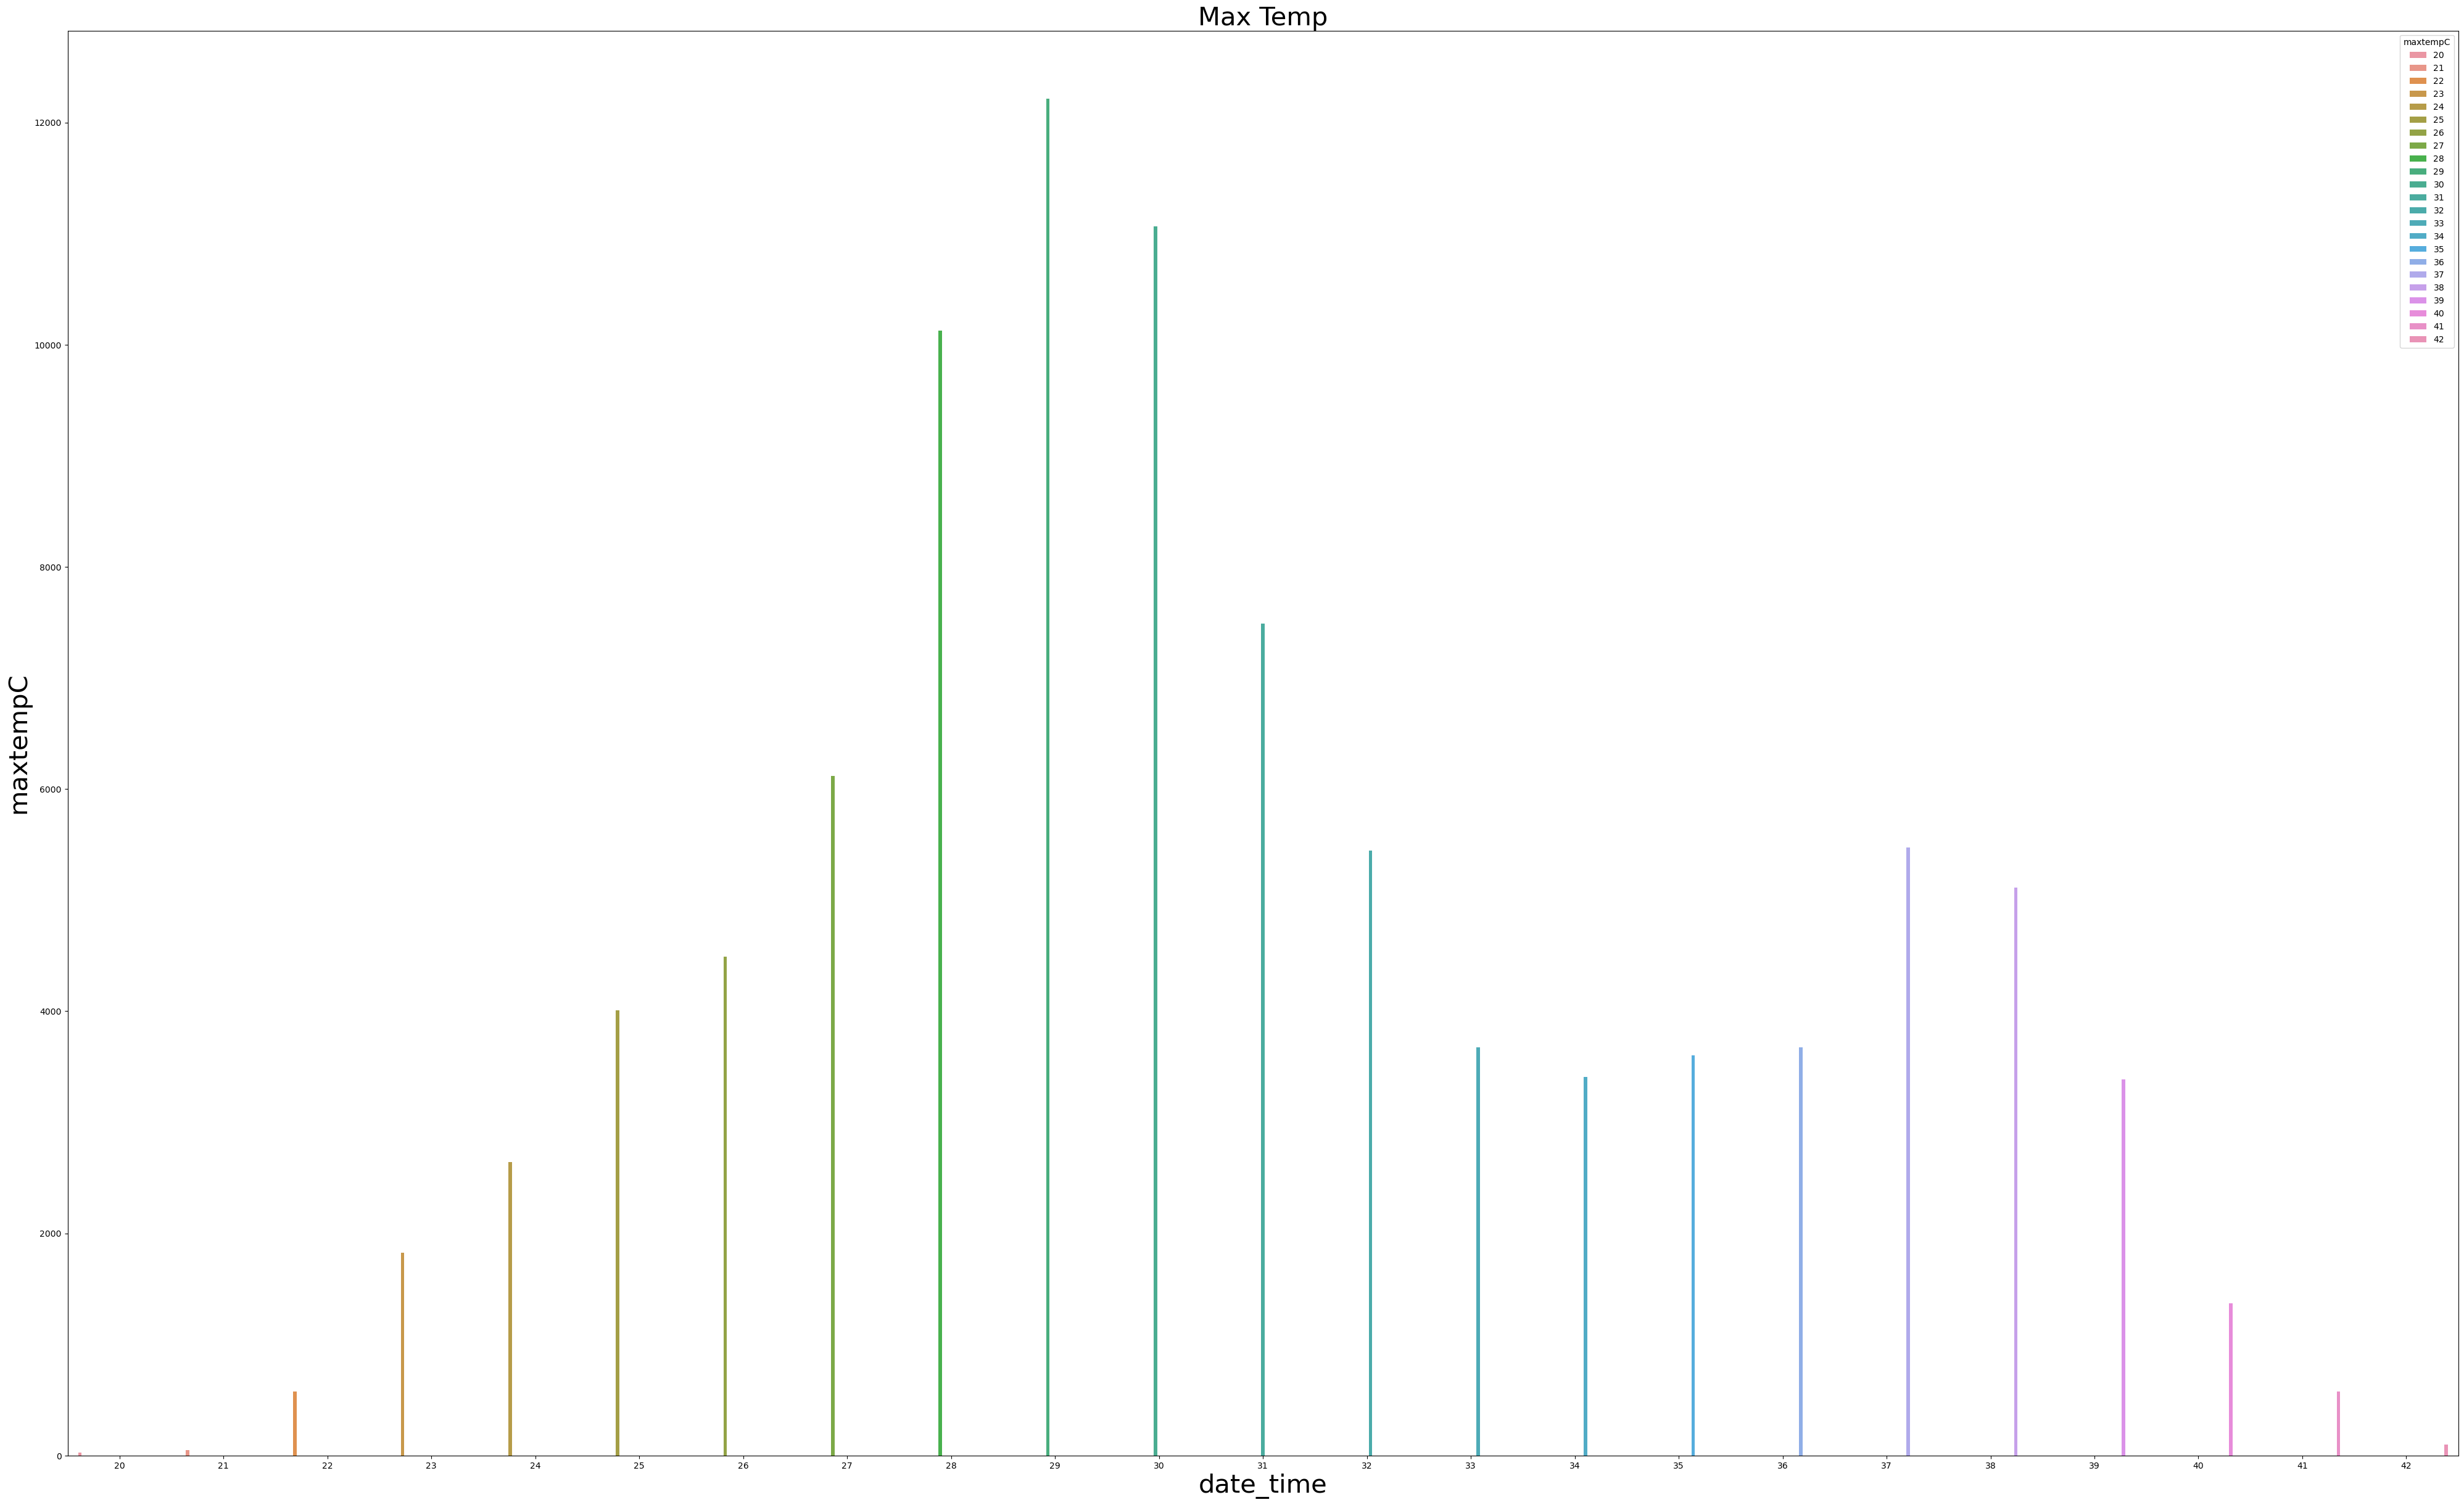

In [44]:
plt.figure(figsize = (50,30))
axl = sns.countplot(x = 'maxtempC',hue='maxtempC', data = df1)
plt.title('Max Temp', size = 30)
plt.xlabel('date_time', size = 30)
plt.ylabel('maxtempC',size = 30)
plt.show()

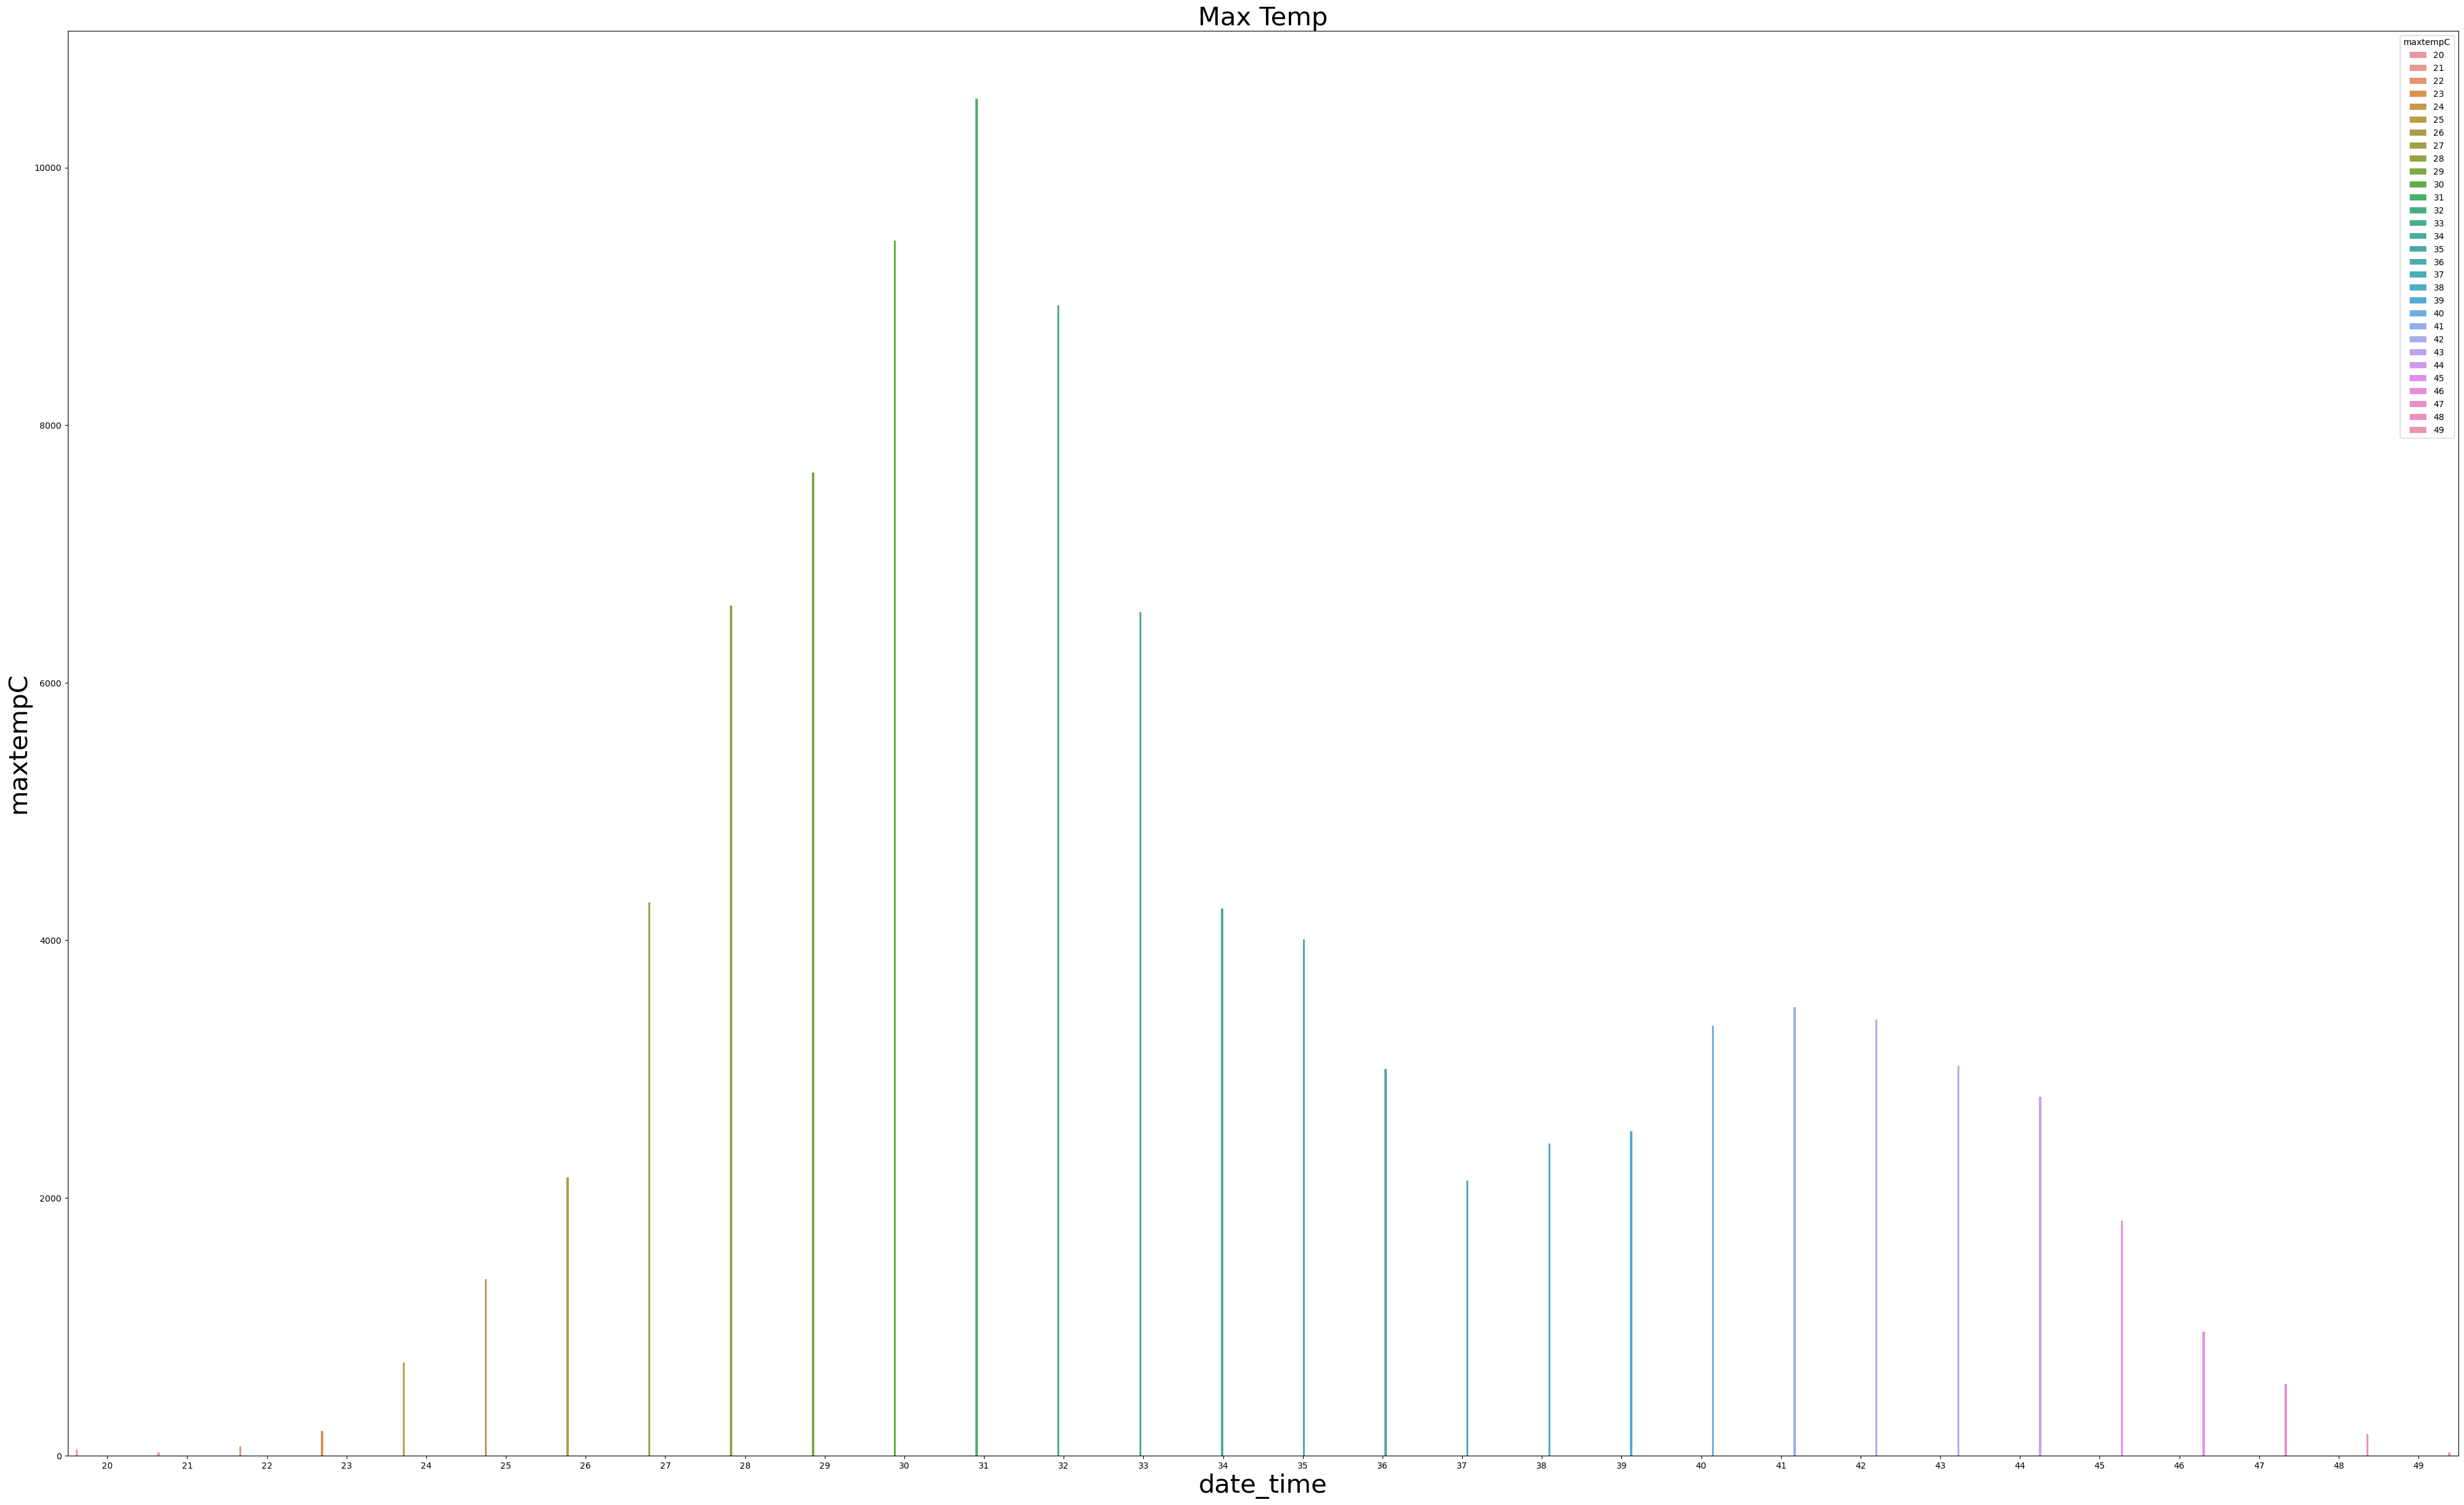

In [45]:
plt.figure(figsize = (50,30))
axl = sns.countplot(x = 'maxtempC',hue='maxtempC', data = df2)
plt.title('Max Temp', size = 30)
plt.xlabel('date_time', size = 30)
plt.ylabel('maxtempC',size = 30)
plt.show()

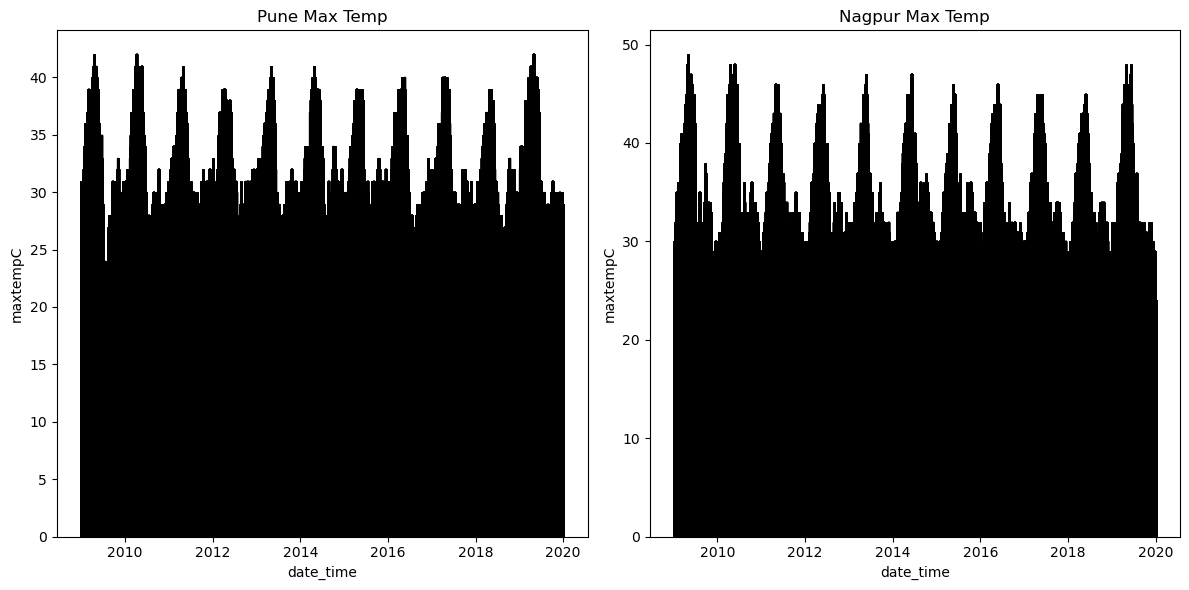

In [46]:
import matplotlib.pyplot as plt

# Assuming df1 and df2 are your DataFrames with relevant columns
x_positions_1 = df1['date_time']
x_positions_2 = df2['date_time']

bar_heights_1 = df1['maxtempC']
bar_heights_2 = df2['maxtempC']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the first bar chart
axes[0].bar(x_positions_1, bar_heights_1, color='blue', edgecolor = 'k')
axes[0].set_xlabel('date_time')
axes[0].set_ylabel('maxtempC')
axes[0].set_title('Pune Max Temp')

# Plot the second bar chart
axes[1].bar(x_positions_2, bar_heights_2, color='green', edgecolor = 'k')
axes[1].set_xlabel('date_time')
axes[1].set_ylabel('maxtempC')
axes[1].set_title('Nagpur Max Temp')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

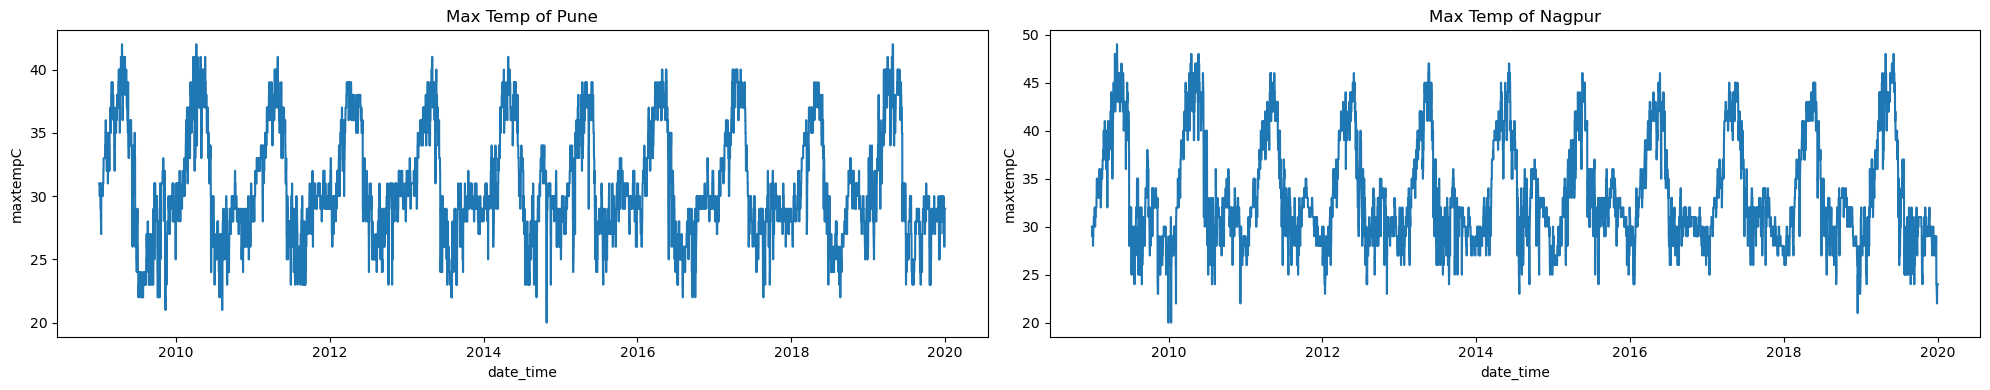

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 4))

# Plot 1
x1 = df1['date_time']
y1 = df1['maxtempC']
axes[0].plot(x1, y1)
axes[0].set_title('Max Temp of Pune')
axes[0].set_xlabel('date_time')
axes[0].set_ylabel('maxtempC')

# Plot 2
x2 = df2['date_time']
y2 = df2['maxtempC']
axes[1].plot(x2, y2)
axes[1].set_title('Max Temp of Nagpur')
axes[1].set_xlabel('date_time')
axes[1].set_ylabel('maxtempC')

# Set labels and titles
for ax in axes:
    ax.set_xlabel('date_time')
    ax.set_ylabel('maxtempC')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'set_xlabel'

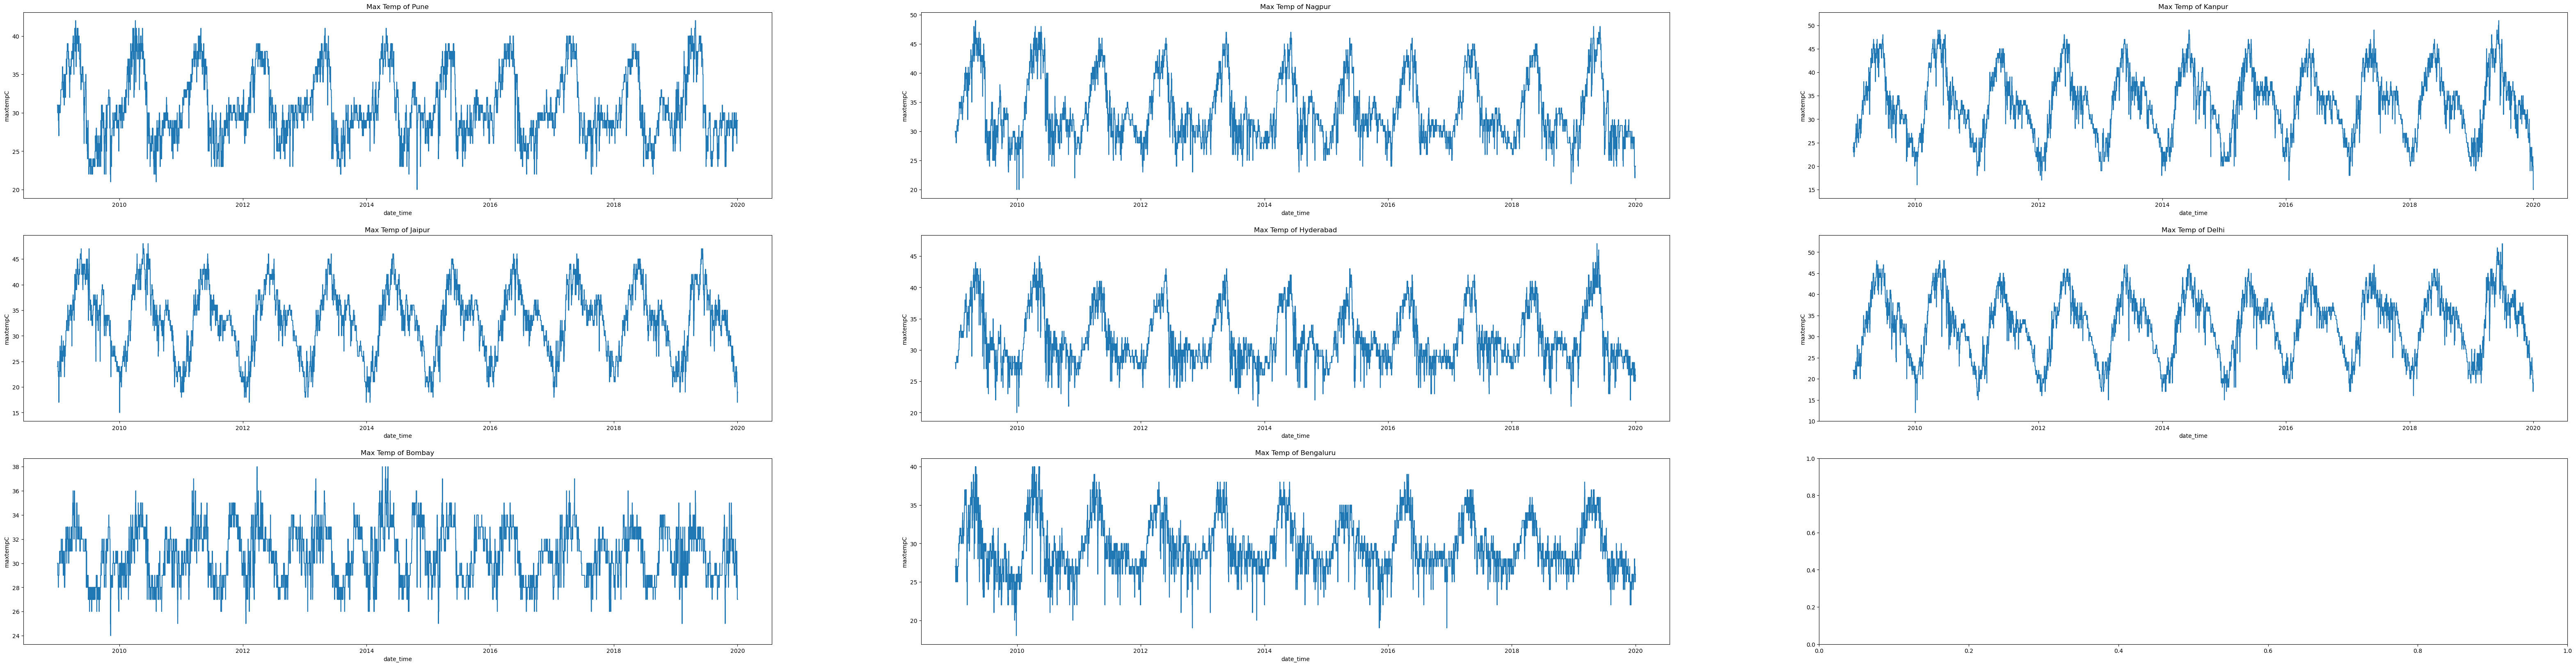

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(80,20))

# Plot 1
x1 = df1['date_time']
y1 = df1['maxtempC']
axes[0,0].plot(x1, y1)
axes[0,0].set_title('Max Temp of Pune')
axes[0,0].set_xlabel('date_time')
axes[0,0].set_ylabel('maxtempC')

# Plot 2
x2 = df2['date_time']
y2 = df2['maxtempC']
axes[0,1].plot(x2, y2)
axes[0,1].set_title('Max Temp of Nagpur')
axes[0,1].set_xlabel('date_time')
axes[0,1].set_ylabel('maxtempC')

# Plot 3
x3 = df3['date_time']
y3 = df3['maxtempC']
axes[0,2].plot(x3, y3)
axes[0,2].set_title('Max Temp of Kanpur')
axes[0,2].set_xlabel('date_time')
axes[0,2].set_ylabel('maxtempC')

# Plot 4
x4 = df4['date_time']
y4 = df4['maxtempC']
axes[1,0].plot(x4, y4)
axes[1,0].set_title('Max Temp of Jaipur')
axes[1,0].set_xlabel('date_time')
axes[1,0].set_ylabel('maxtempC')

# Plot 5
x5 = df5['date_time']
y5 = df5['maxtempC']
axes[1,1].plot(x5, y5)
axes[1,1].set_title('Max Temp of Hyderabad')
axes[1,1].set_xlabel('date_time')
axes[1,1].set_ylabel('maxtempC')

# Plot 6
x6 = df6['date_time']
y6 = df6['maxtempC']
axes[1,2].plot(x6, y6)
axes[1,2].set_title('Max Temp of Delhi')
axes[1,2].set_xlabel('date_time')
axes[1,2].set_ylabel('maxtempC')

# Plot 7
x7 = df7['date_time']
y7 = df7['maxtempC']
axes[2,0].plot(x7, y7)
axes[2,0].set_title('Max Temp of Bombay')
axes[2,0].set_xlabel('date_time')
axes[2,0].set_ylabel('maxtempC')

# Plot 8
x8 = df8['date_time']
y8 = df8['maxtempC']
axes[2,1].plot(x8, y8)
axes[2,1].set_title('Max Temp of Bengaluru')
axes[2,1].set_xlabel('date_time')
axes[2,1].set_ylabel('maxtempC')

# Set labels and titles
for ax in axes:
    ax.set_xlabel('date_time')
    ax.set_ylabel('maxtempC')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
import matplotlib.pyplot as plt

x_positions_1 = df1['date_time']
x_positions_2 = df2['date_time']
x_positions_3= df3['date_time']
x_positions_4= df4['date_time']
x_positions_5= df5['date_time']
x_positions_6= df6['date_time']
x_positions_7= df7['date_time']
x_positions_8= df8['date_time']

bar_heights_1 = df1['maxtempC']
bar_heights_2 = df2['maxtempC']
bar_heights_3 = df3['maxtempC']
bar_heights_4 = df4['maxtempC']
bar_heights_5 = df5['maxtempC']
bar_heights_6 = df6['maxtempC']
bar_heights_7 = df7['maxtempC']
bar_heights_8 = df8['maxtempC']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,18))

# Plot 1
axes[0,0].bar(x_positions_1, bar_heights_1, color='blue', edgecolor = 'k')
axes[0,0].set_xlabel('date_time')
axes[0,0].set_ylabel('maxtempC')
axes[0,0].set_title('Max Temp of Pune', size= 10)

# Plot 2
axes[0,1].bar(x_positions_2, bar_heights_2, color='green', edgecolor = 'k')
axes[0,1].set_xlabel('date_time')
axes[0,1].set_ylabel('maxtempC')
axes[0,1].set_title('Max Temp of Nagpur', size= 10)

# Plot 3
axes[0,2].bar(x_positions_3, bar_heights_3, color='red', edgecolor = 'k')
axes[0,2].set_xlabel('date_time')
axes[0,2].set_ylabel('maxtempC')
axes[0,2].set_title('Max Temp of Kanpur', size= 10)

#Plot 4
axes[1,0].bar(x_positions_4, bar_heights_4, color='purple', edgecolor = 'k')
axes[1,0].set_xlabel('date_time')
axes[1,0].set_ylabel('maxtempC')
axes[1,0].set_title('Max Temp of Jaipur', size= 10)

# Plot 5
axes[1,1].bar(x_positions_5, bar_heights_5, color='orange', edgecolor = 'k')
axes[1,1].set_xlabel('date_time')
axes[1,1].set_ylabel('maxtempC')
axes[1,1].set_title('Max Temp of Hyderabad', size= 10)

# Plot 6
axes[1,2].bar(x_positions_6, bar_heights_6, color='pink', edgecolor = 'k')
axes[1,2].set_xlabel('date_time')
axes[1,2].set_ylabel('maxtempC')
axes[1,2].set_title('Max Temp of Delhi', size= 10)

# Plot 7
axes[2,0].bar(x_positions_7, bar_heights_7, color='violet', edgecolor = 'k')
axes[2,0].set_xlabel('date_time')
axes[2,0].set_ylabel('maxtempC')
axes[2,0].set_title('Max Temp of Bombay', size= 10)

# Plot 8
axes[2,1].bar(x_positions_8, bar_heights_8, color='#5FD93B', edgecolor = 'k')
axes[2,1].set_xlabel('date_time')
axes[2,1].set_ylabel('maxtempC')
axes[2,1].set_title('Max Temp of Bengaluru ', size= 10)


# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(80,20))

# Plot 1
x1 = df1['date_time']
y1 = df1['mintempC']
axes[0,0].plot(x1, y1)
axes[0,0].set_title('Max Temp of Pune')
axes[0,0].set_xlabel('date_time')
axes[0,0].set_ylabel('mintempC')

# Plot 2
x2 = df2['date_time']
y2 = df2['mintempC']
axes[0,1].plot(x2, y2)
axes[0,1].set_title('Max Temp of Nagpur')
axes[0,1].set_xlabel('date_time')
axes[0,1].set_ylabel('mintempC')

# Plot 3
x3 = df3['date_time']
y3 = df3['mintempC']
axes[0,2].plot(x3, y3)
axes[0,2].set_title('Max Temp of Kanpur')
axes[0,2].set_xlabel('date_time')
axes[0,2].set_ylabel('mintempC')

# Plot 4
x4 = df4['date_time']
y4 = df4['mintempC']
axes[1,0].plot(x4, y4)
axes[1,0].set_title('Max Temp of Jaipur')
axes[1,0].set_xlabel('date_time')
axes[1,0].set_ylabel('mintempC')

# Plot 5
x5 = df5['date_time']
y5 = df5['mintempC']
axes[1,1].plot(x5, y5)
axes[1,1].set_title('Max Temp of Hyderabad')
axes[1,1].set_xlabel('date_time')
axes[1,1].set_ylabel('mintempC')

# Plot 6
x6 = df6['date_time']
y6 = df6['mintempC']
axes[1,2].plot(x6, y6)
axes[1,2].set_title('Max Temp of Delhi')
axes[1,2].set_xlabel('date_time')
axes[1,2].set_ylabel('mintempC')

# Plot 7
x7 = df7['date_time']
y7 = df7['mintempC']
axes[2,0].plot(x7, y7)
axes[2,0].set_title('Max Temp of Bombay')
axes[2,0].set_xlabel('date_time')
axes[2,0].set_ylabel('mintempC')

# Plot 8
x8 = df8['date_time']
y8 = df8['mintempC']
axes[2,1].plot(x8, y8)
axes[2,1].set_title('Max Temp of Bengaluru')
axes[2,1].set_xlabel('date_time')
axes[2,1].set_ylabel('mintempC')

# Set labels and titles
for ax in axes:
    ax.set_xlabel('date_time')
    ax.set_ylabel('mintempC')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()